<a href="https://colab.research.google.com/github/vivirocha/Bootcamp_MachineLearning/blob/main/Desafio_ModelosPreditivosSeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bootcamp - Eng. Machine Learning - IGTI**

Desafio - Módulo 2

*Modelos Preditivos e Séries Temporais*


**Enunciado** <br>
Neste desafio, serão abordados conceitos apresentados durante a disciplina Modelos Preditivos e Séries Temporais (MPT). Será utilizado o dataset “Banknote authentication”, disponível no UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/banknote+authentication). <br>
Este dataset consiste em atributos contínuos (variance, skewness, curtosis e entropy) extraídos de imagens de cédulas reais e falsificadas através de uma etapa de processamento de sinais (transformação de Wavelet), além da indicação se o exemplo é de uma cédula genuína (class = 0) ou falsificada (class = 1).

In [79]:
#Importando bibliotecas
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [80]:
#Carregando e lendo o banco de dados de estudo
banknote=pd.read_csv("data_banknote_authentication.txt", 
                     sep=',',
                     header=None,
                     names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Qual o tamanho desse dataset (número de linhas, número de colunas)? 


In [81]:
banknote.shape

(1372, 5)

Qual variável possui o maior range (diferença entre valor máximo e mínimo)? 


Qual a média da coluna skewness? 


In [82]:
import numpy as np

In [83]:
mediaskewness = np.mean(banknote['skewness'])
round(mediaskewness, 5)

1.92235

Qual a média da coluna entropy? 

In [84]:
mediaentropia = np.mean(banknote['entropy'])
round(mediaentropia, 5)

-1.19166

Qual a mediana da coluna variance? 

In [85]:
mediavariance = np.median(banknote['variance'])
round(mediavariance, 5)

0.49618

Qual o desvio padrão da coluna curtosis? 


In [86]:
desvpad = np.std(banknote['curtosis'])
round(desvpad, 5)

4.30846

Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)? 


In [87]:
class1=banknote['class']==1
class1.sum()

610

In [88]:
porcentagem1 = (610/1372)*100
round(porcentagem1, 2)

44.46

Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis? 


In [89]:
import seaborn as sns
banknote.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [90]:
correlation = banknote.corr()
print(correlation.loc['skewness','curtosis'])
round(correlation, 6)

-0.7868952243065797


,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


Qual a acurácia do KNN no conjunto de teste?  <br>
*Utilize a variável “class” como saída e as demais como entrada dos modelos.*

In [91]:
from sklearn.model_selection import train_test_split


In [122]:
X = banknote.iloc[:,:-1] 
y = banknote.iloc[:,4]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
clf_KNN = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(X_train, y_train)                 #aplica a classificação
y_pred = clf_KNN.predict(X_test)


In [127]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values,y_pred))

[[234   1]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.99      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



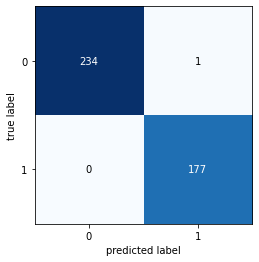

In [128]:
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [130]:
#Criando o objeto de classificação
clf = DecisionTreeClassifier()

#Realizando o treinamento do classificador
clf = clf.fit(X_train, y_train)

#Realizando a previsão de classificação
y_pred = clf.predict(X_test)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values,y_pred))

[[231   4]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       235
           1       0.98      1.00      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



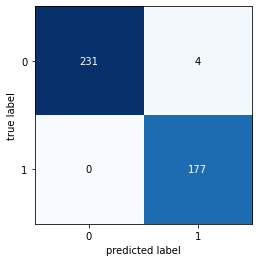

In [132]:
#Avaliando o modelo
#plotando da matriz de confusão
arvmatriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=arvmatriz_confusao)
plt.show()

In [133]:
#Importando as bibliotecas necessárias para a construção do algoritimo SVM
from sklearn.svm import SVC

In [134]:
clf = SVC()

In [135]:
#Realizando a classificação via SVM
clf.fit(X_train, y_train)

SVC()

In [136]:
#Realizando a previsão de classificação
y_pred = clf.predict(X_test)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values,y_pred))

[[235   0]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



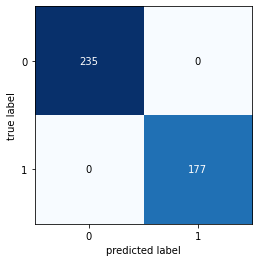

In [138]:
#Avaliando o modelo
svmmatriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=svmmatriz_confusao)
plt.show()